# SALLY 1d checks

Johann Brehmer, Kyle Cranmer, Felix Kling, Duccio Pappadopulo, Josh Ruderman 2018

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
% matplotlib inline
import logging
import os

import madminer.core
from madminer.fisherinformation import FisherInformation
from madminer.plotting import plot_fisher_information_contours_2d
from madminer.ml import MLForge

logging.basicConfig(format='%(asctime)s  %(message)s', datefmt='%H:%M')

In [2]:
base_dir = '/Users/johannbrehmer/work/projects/madminer/diboson_mining/'
mg_dir = '/Users/johannbrehmer/work/projects/madminer/MG5_aMC_v2_6_2/'

In [3]:
sample_dir = base_dir + 'data/samples/wgamma/'
card_dir = base_dir + 'cards/wgamma/'
ufo_model_dir = card_dir + 'SMWgamma_UFO'
run_card_dir = card_dir + 'run_cards/'
mg_process_dir = base_dir + 'data/mg_processes/wgamma/'
log_dir = base_dir + 'logs/wgamma/'
temp_dir = base_dir + 'data/temp'
delphes_dir = mg_dir + 'Delphes'
model_dir = base_dir + 'data/models/wgamma/'

## Data

In [4]:
obs = 25

x = np.load(sample_dir + 'all_local/x_all.npy')[:,25]
t_xz = np.load(sample_dir + 'all_local/t_xz_all.npy')

order = np.argsort(x)
x = x[order]
t_xz = t_xz[order]

## Baseline: means

In [6]:
n_mean = 50000

n_use = x.shape[0]
if n_use % n_mean > 0:
    n_use -= n_use % n_mean

x_mean_data = x[:n_use].reshape(n_use // n_mean, n_mean)
t_xz_mean_data = t_xz[:n_use].reshape(n_use // n_mean, n_mean, -1)

x_means = np.mean(x_mean_data, axis=1)
x_mins = np.min(x_mean_data, axis=1)
x_maxs = np.max(x_mean_data, axis=1)

t_xz_means = np.mean(t_xz_mean_data, axis=1)
t_xz_err = np.std(t_xz_mean_data, axis=1) / n_mean**0.5


## \hat{t} with ML

In [34]:
forge1 = MLForge(debug=True)
forge1.load(model_dir + 'sally_deltaphi_la_2')
that_x_1 = forge1.evaluate(
    x_filename = sample_dir + 'all_local/x_all.npy'
)

16:11  
16:11  ------------------------------------------------------------
16:11  |                                                          |
16:11  |  MadMiner v2018.10.12                                    |
16:11  |                                                          |
16:11  |           Johann Brehmer, Kyle Cranmer, and Felix Kling  |
16:11  |                                                          |
16:11  ------------------------------------------------------------
16:11  
16:11  Loading settings from /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/models/wgamma/sally_deltaphi_la_2_settings.json
16:11    Found method sally, 1 observables, 2 parameters, (100, 100, 100) hidden layers, tanh activation function, features [25]
16:11  Loading state dictionary from /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/models/wgamma/sally_deltaphi_la_2_state_dict.pt
16:11  Loading evaluation data
16:11  Starting score evaluation


In [35]:
print(that_x_1)
that_x_1 = that_x_1[order]

[[ 0.13613126  0.01459164]
 [-0.06825753  0.04318034]
 [-0.06789845  0.04308787]
 ...
 [ 0.1307929   0.01467526]
 [ 0.09498712  0.01010871]
 [ 0.02854552  0.0169614 ]]


In [36]:
forge2 = MLForge(debug=True)
forge2.load(model_dir + 'sally_deltaphi_la_big_2')
that_x_2 = forge2.evaluate(
    x_filename = sample_dir + 'all_local/x_all.npy'
)

16:11  
16:11  ------------------------------------------------------------
16:11  |                                                          |
16:11  |  MadMiner v2018.10.12                                    |
16:11  |                                                          |
16:11  |           Johann Brehmer, Kyle Cranmer, and Felix Kling  |
16:11  |                                                          |
16:11  ------------------------------------------------------------
16:11  
16:11  Loading settings from /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/models/wgamma/sally_deltaphi_la_big_2_settings.json
16:11    Found method sally, 1 observables, 2 parameters, (100, 100, 100) hidden layers, tanh activation function, features [25]
16:11  Loading state dictionary from /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/models/wgamma/sally_deltaphi_la_big_2_state_dict.pt
16:11  Loading evaluation data
16:11  Starting score evaluation


In [37]:
print(that_x_2)
that_x_2 = that_x_2[order]

[[ 0.1160669   0.01565914]
 [-0.10304064  0.03523173]
 [-0.10352502  0.03538062]
 ...
 [ 0.11672198 -0.00495298]
 [ 0.05836948  0.00042729]
 [-0.01177231  0.01490526]]


## Plot

In [38]:
epsilon = 1.e-3

x_ = np.empty((x_mins.size*2,), dtype=x_mins.dtype)
x_[0::2] = x_mins + epsilon
x_[1::2] = x_maxs - epsilon

y_ = np.empty((t_xz_means.shape[0]*2,2), dtype=t_xz_means.dtype)
y_[0::2] = t_xz_means
y_[1::2] = t_xz_means

e_ = np.empty((t_xz_means.shape[0]*2,2), dtype=t_xz_err.dtype)
e_[0::2] = t_xz_err
e_[1::2] = t_xz_err


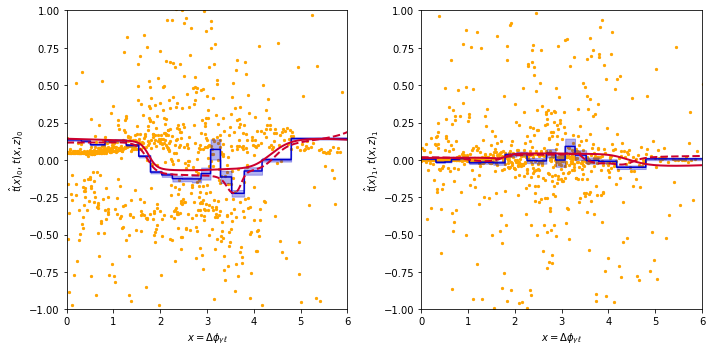

In [39]:
xmin, xmax = 0., 500.
skip = 1000

fig = plt.figure(figsize=(10.,5))

for i in range(2):
    ax = plt.subplot(1,2,i+1)

    plt.scatter(x[::skip], t_xz[::skip,i], s=5., alpha=1., c='orange')
    plt.fill_between(x_, y_[:,i] - e_[:,i], y_[:,i] + e_[:,i], alpha=0.3, color='mediumblue')
    plt.plot(x_, y_[:,i], lw=1.5, c='mediumblue')
    plt.plot(x[::skip], that_x_1[::skip,i], lw=2, c='#CC002E')
    plt.plot(x[::skip], that_x_2[::skip,i], lw=2, ls='--', c='#CC002E')

    plt.xlabel(r'$x = \Delta \phi_{\gamma \ell}$')
    plt.ylabel(r'$\hat{t}(x)_' +  str(i) + '$, $t(x,z)_' +  str(i) + '$')
    plt.ylim(-1.,1.)
    plt.xlim(0,6.)

plt.tight_layout()
plt.show()